In [1]:
# https://math.stackexchange.com/questions/32600/whats-the-opposite-of-a-cross-product
# https://math.stackexchange.com/questions/4277293/finding-vec-b-from-vec-a-times-vec-b-vec-a-and-alpha-angle-vec

%matplotlib notebook

import math
import sympy

import geometrik.threed as g3d

from IPython.display import Latex

In [2]:
an = 0.7 * g3d.Vector(3.0, 1.0, 0.0).normalized()
bn = 0.7 * g3d.Vector(1.0, 4.0, -1.0).normalized()

m = (an @ bn).normalized()

at = 0.6 * m
a = an + at
bt = 0.6 * m
b = bn + bt

In [3]:
abm_val = {
    'A_x': a.x, 'A_y': a.y, 'A_z': a.z,
    'M_x': m.x, 'M_y': m.y, 'M_z': m.z,
    'B_x': b.x, 'B_y': b.y, 'B_z': b.z,
}

<IPython.core.display.Javascript object>


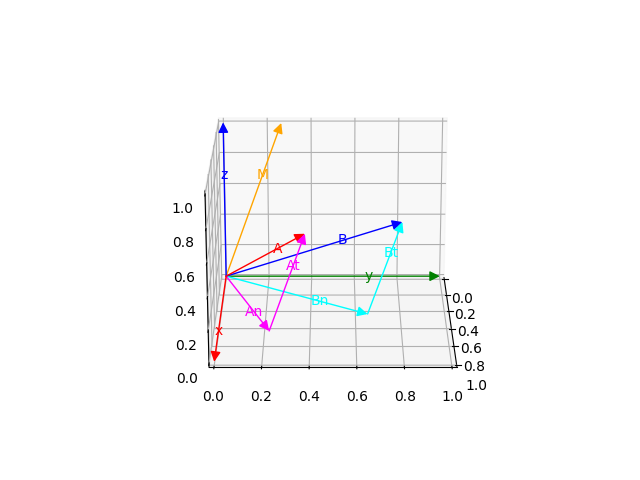

In [4]:
with g3d.VectorPlot() as vpl :
    vpl.add_point(g3d.Vector(1.0, 0.0, 0.0), 'x', 'r')
    vpl.add_point(g3d.Vector(0.0, 1.0, 0.0), 'y', 'g')
    vpl.add_point(g3d.Vector(0.0, 0.0, 1.0), 'z', 'b')
 
    vpl.add_point(a, 'A', 'r')
    vpl.add_point(an, 'An', 'magenta')
    vpl.add_floating(an, at, 'At', 'magenta')

    vpl.add_point(b, 'B', 'b')
    vpl.add_point(bn, 'Bn', 'cyan')
    vpl.add_floating(bn, bt, 'Bt', 'cyan')

    vpl.add_point(m, 'M', 'orange')

In [ ]:
A = g3d.Vector.symbolic('A')
B = g3d.Vector.symbolic('B')
M = g3d.Vector.symbolic('M')

In [ ]:
At = A.project_tangent(M)
An = A.project_normal(M)
Bt = B.project_tangent(M)
Bn = B.project_normal(M)

In [ ]:
Q = g3d.Vector.symbolic('Q')
N = An @ Bn

In [ ]:
Z = ((An @ Q) - N)
Z.x.expand().simplify()

In [ ]:
u = sympy.symbols('u')
U = A * sympy.cos(u) + C * sympy.sin(u)

In [ ]:
u_sol = sympy.solve(U.norm - M.norm, 'u')

In [ ]:
u_fin = A * sympy.cos(u_sol[0]) + C * sympy.sin(u_sol[0])
u_fin.x.simplify()

In [ ]:


with g3d.VectorPlot() as vpl :
    vpl.add_point(g3d.Vector(1.0, 0.0, 0.0), 'x', 'r')
    vpl.add_point(g3d.Vector(0.0, 1.0, 0.0), 'y', 'g')
    vpl.add_point(g3d.Vector(0.0, 0.0, 1.0), 'z', 'b')
 
    vpl.add_point(A.subs(abm_val), 'A', 'r')
    vpl.add_point(An.subs(abm_val), 'An', 'magenta')
    vpl.add_floating(An.subs(abm_val), At.subs(abm_val), 'At', 'magenta')

    vpl.add_point(B.subs(abm_val), 'B', 'b')
    vpl.add_point(Bn.subs(abm_val), 'Bn', 'cyan')
    vpl.add_floating(Bn.subs(abm_val), Bt.subs(abm_val), 'Bt', 'cyan')

    vpl.add_point(M.subs(abm_val), 'M', 'orange')

In [ ]:
bx = sympy.solve((At-Bt).x, 'B_x')[0].simplify().expand().collect(['B_x', 'B_y', 'B_z'])
bx

In [ ]:
(At-Bt).y.subs({'B_x': bx}).simplify().expand().collect(['B_x', 'B_y', 'B_z'])

In [ ]:
am_val = {
    'A_x': a.x, 'A_y': a.y, 'A_z': a.z,
    'M_x': m.x, 'M_y': m.y, 'M_z': m.z,
}

In [ ]:
Z = (An @ Bn) - M

In [ ]:
Zx = Z.x.simplify().expand().collect(['B_x', 'B_y', 'B_z'])
Zx

In [ ]:
bx = sympy.solve(Zx, 'B_x')[0].simplify()
bx.simplify().expand().collect(['B_x', 'B_y', 'B_z'])

In [ ]:
bx.subs(am_val)

In [ ]:
Zy = Z.y.simplify().expand().collect(['B_x', 'B_y', 'B_z'])
Zy

In [ ]:
by = sympy.solve(Z.y.subs({'B_x': bx}), 'B_y')
by

In [ ]:
by.subs({'A_x': a.x, 'A_y': a.y, 'A_z': a.z, 'M_x': m.x, 'M_y':m.y, 'M_z': m.z}).subs({'B_z': b.z})

In [ ]:
Zz = Z.z.subs({'B_y': by}).simplify()
Zz

In [ ]:
bz = sympy.solve(Zz, 'B_z')
bz

In [ ]:
Zz.subs({'A_x': a.x, 'A_y': a.y, 'A_z': a.z, 'M_x': m.x, 'M_y':m.y, 'M_z': m.z})

In [ ]:
An * M == Bn * M == 0

In [ ]:
Bn * M

In [ ]:
from IPython.display import Latex
Latex("$\psi$")

In [ ]:
import sympy

a, b, c = sympy.symbols('a b c')
(-b - sympy.sqrt(b**2 - 4*a*c)) / (2*a)

In [ ]:
"$\psi$"

# Inversion par le produit triple



In [5]:
A = g3d.Vector.symbolic('A')
B = g3d.Vector.symbolic('B')
M = g3d.Vector.symbolic('M').normalized() # the unit vector of the axis of rotation

At = A.project_tangent(M)
An = A.project_normal(M) # the projection of A on the plane of normal M
Bt = At

alpha = sympy.symbols('alpha') # the angle of rotation

In [ ]:
AxB = M * An.norm_2 * sympy.sin(alpha)

In [ ]:
Bn = ( An * (AxB.norm * (1 / sympy.tan(alpha))) - (An @ AxB) ) * (1 / An.norm_2)
B = Bn + Bt

In [ ]:
with g3d.VectorPlot() as vpl :
    vpl.add_point(g3d.Vector(1.0, 0.0, 0.0), 'x', 'r')
    vpl.add_point(g3d.Vector(0.0, 1.0, 0.0), 'y', 'g')
    vpl.add_point(g3d.Vector(0.0, 0.0, 1.0), 'z', 'b')
 
    vpl.add_point(A.subs(abm_val), 'A', 'r')
    vpl.add_point(An.subs(abm_val), 'An', 'magenta')
    vpl.add_floating(An.subs(abm_val), At.subs(abm_val), 'At', 'magenta')

    #vpl.add_point(B.subs(abm_val), 'B', 'b')
    for i in range(64) :
        vpl.add_point(Bn.subs(abm_val).subs({'alpha':0.1*(i+1)}), 'Bn', 'cyan')
    #vpl.add_floating(Bn.subs(abm_val), Bt.subs(abm_val), 'Bt', 'cyan')

    vpl.add_point(M.subs(abm_val), 'M', 'orange')

# Simple deviation

In [7]:
Bn = A.rotate(M, alpha)
Bn.x.simplify().replace(sympy.simplify('M_x**2 + M_y**2 + M_z**2'), 1)

M_x*(A_x*M_x + A_y*M_y + A_z*M_z) + (A_x - M_x*(A_x*M_x + A_y*M_y + A_z*M_z))*cos(alpha) - (M_y*(A_z - M_z*(A_x*M_x + A_y*M_y + A_z*M_z)) - M_z*(A_y - M_y*(A_x*M_x + A_y*M_y + A_z*M_z)))*sin(alpha)

<IPython.core.display.Javascript object>


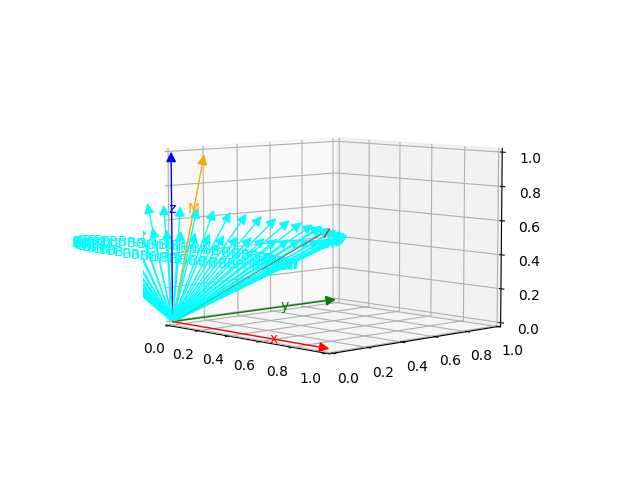

In [6]:
with g3d.VectorPlot() as vpl :
    vpl.add_point(g3d.Vector(1.0, 0.0, 0.0), 'x', 'r')
    vpl.add_point(g3d.Vector(0.0, 1.0, 0.0), 'y', 'g')
    vpl.add_point(g3d.Vector(0.0, 0.0, 1.0), 'z', 'b')
 
    vpl.add_point(A.subs(abm_val), 'A', 'r')

    for i in range(64) :
        vpl.add_point(A.rotate(M).subs(abm_val).subs({'alpha':0.1*(i+1)}), 'Bn', 'cyan')

    vpl.add_point(M.subs(abm_val), 'M', 'orange')